<a href="https://colab.research.google.com/github/Saint-Fiston/clustering-random-data/blob/main/Practical_Assessment_2_Clustering_random_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

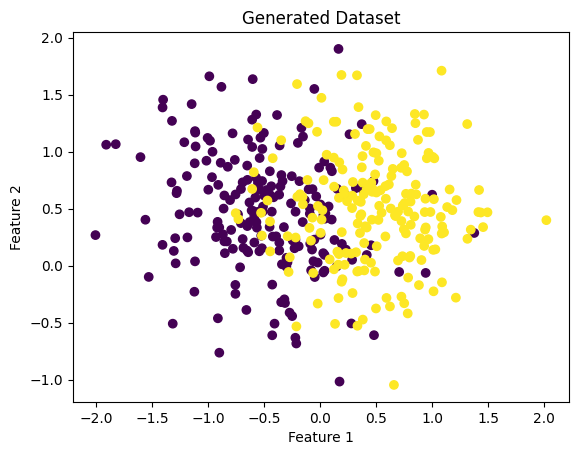

Accuracy: 0.82


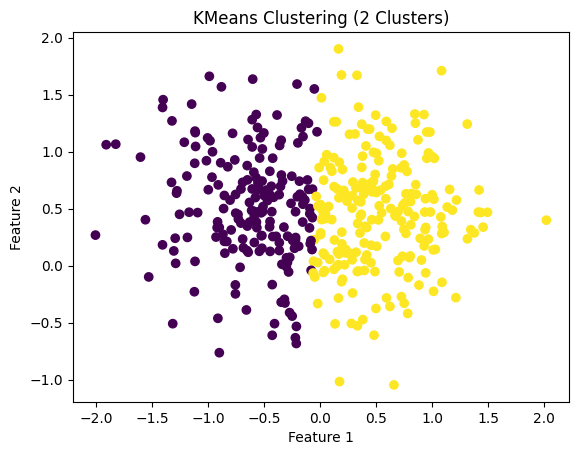

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# ---------------------------
# Step 2: Define dataset parameters
# ---------------------------
N1 = 200  # Number of observations in class 1
N2 = 200  # Number of observations in class 2
d = 1.0   # Distance between class centers
sigma1 = 0.5  # Standard deviation for class 1
sigma2 = 0.5  # Standard deviation for class 2

# ---------------------------
# Step 3: Generate class center locations
# ---------------------------
x1_center = d / 2 * np.array([-1, 1])
x2_center = d / 2 * np.array([1, 1])

# ---------------------------
# Step 4: Create feature matrix
# ---------------------------
noise1 = np.random.normal(scale=sigma1, size=(N1, 2))
noise2 = np.random.normal(scale=sigma2, size=(N2, 2))

X1 = x1_center + noise1
X2 = x2_center + noise2

X = np.concatenate((X1, X2), axis=0)

# ---------------------------
# Step 5: Generate class labels
# ---------------------------
y = np.array([0] * N1 + [1] * N2)

# ---------------------------
# Step 6: Visualize the generated dataset
# ---------------------------
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Dataset")
plt.show()

# ---------------------------
# KMeans clustering
# ---------------------------
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(X)
kmeans_labels = kmeans.labels_

# ---------------------------
# Align KMeans labels with true class labels
# ---------------------------
aligned_labels = np.zeros_like(kmeans_labels)
for cluster in range(n_clusters):
    mask = (kmeans_labels == cluster)
    if mask.sum() > 0:
        aligned_labels[mask] = np.argmax(np.bincount(y[mask]))

# ---------------------------
# Calculate accuracy
# ---------------------------
accuracy = np.sum(aligned_labels == y) / len(y)
print("Accuracy:", accuracy)

# ---------------------------
# Visualize clustering results
# ---------------------------
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KMeans Clustering (2 Clusters)")
plt.show()

